In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Univariate Distributions

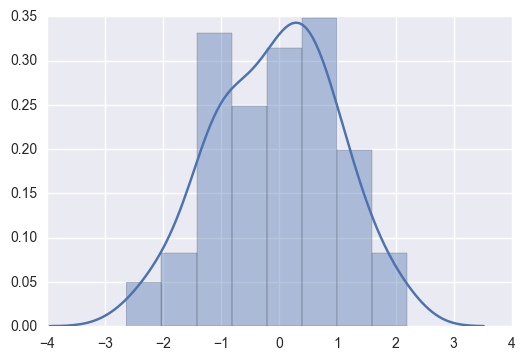

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

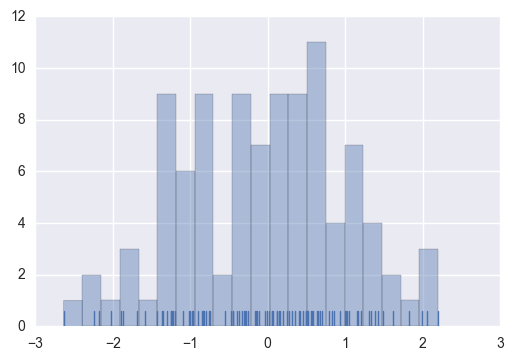

In [3]:
sns.distplot(x, kde=False, rug=True,bins=20);

# Bivariate Distributions

In [4]:
import random

df = pd.DataFrame()

df['x'] = random.sample(range(1, 1000),100)
df['y'] = random.sample(range(1, 1000), 100)

In [5]:
df.head()

,x,y
0,939,98
1,864,274
2,238,18
3,139,233
4,645,390


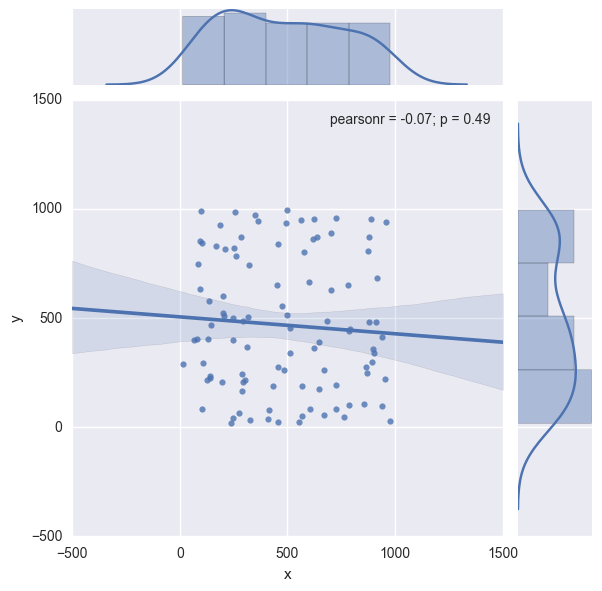

In [6]:
sns.jointplot(x="x",y="y",data=df,kind='reg')#hex , kde, scatter

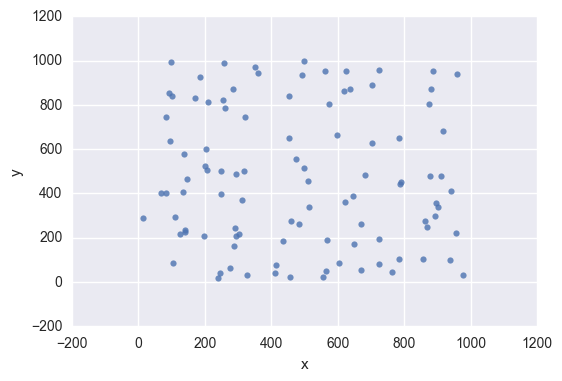

In [7]:
sns.regplot(x="x",y="y",data=df,fit_reg=False)

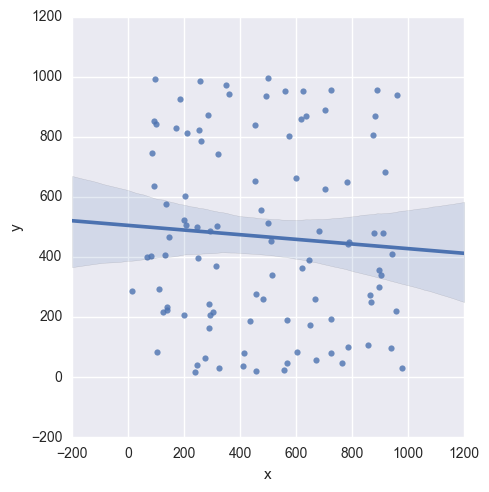

In [8]:
sns.lmplot(x="x",y="y",data=df);

# Pairwise Relationship

In [9]:
iris = sns.load_dataset("iris")

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


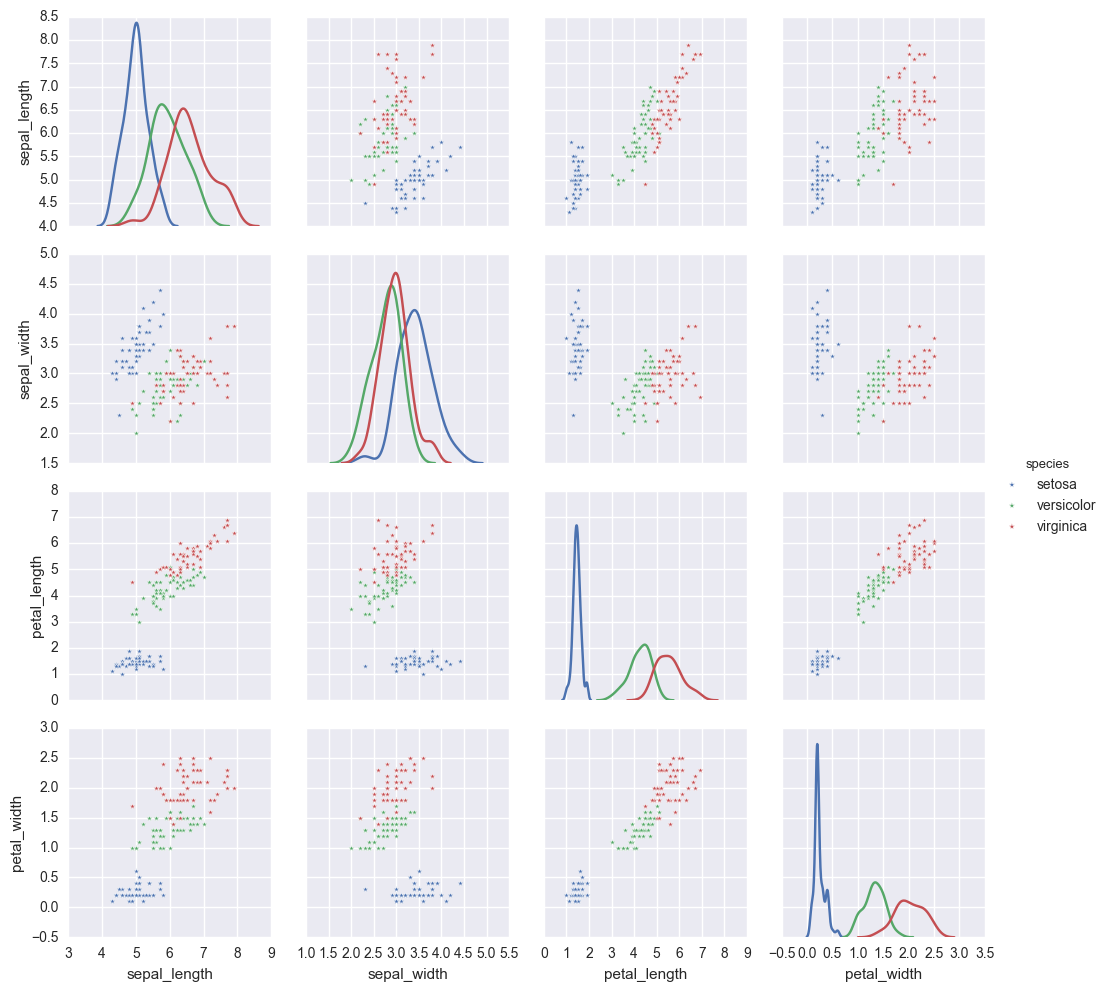

In [11]:
sns.pairplot(iris,kind='scatter',diag_kind='kde',markers='*',hue="species");

# Plotting Categorical Data

In [12]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


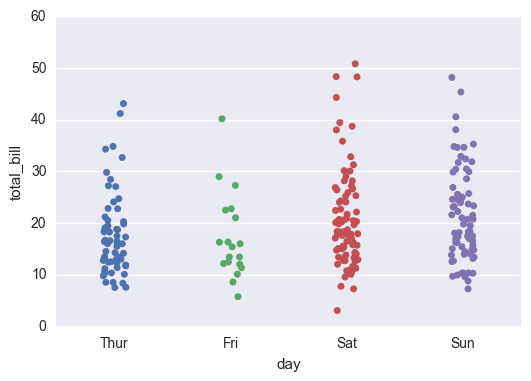

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)#hue='smoker');

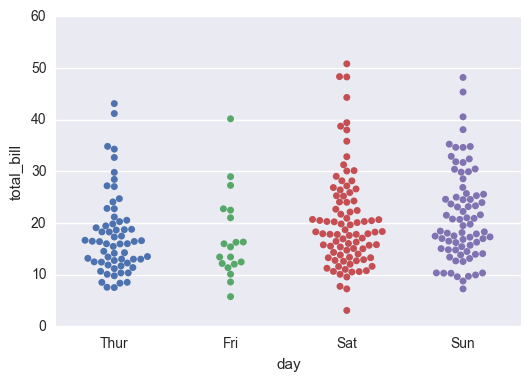

In [15]:
sns.swarmplot(x="day", y="total_bill", data=tips);

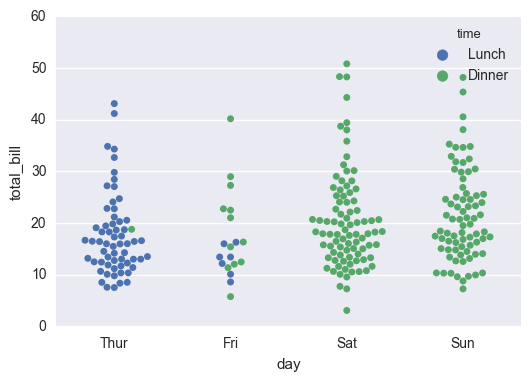

In [16]:
sns.swarmplot(x="day", y="total_bill", data=tips,hue="time");

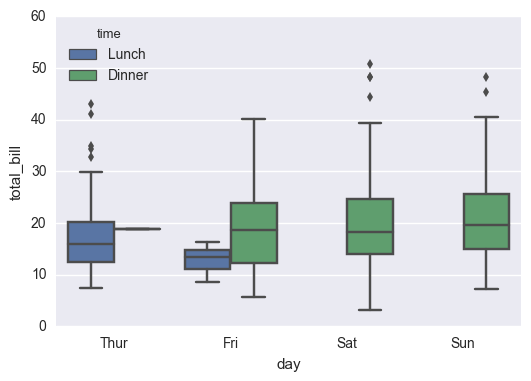

In [17]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

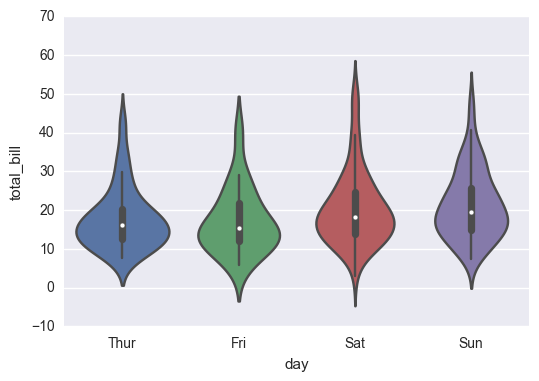

In [18]:
sns.violinplot(x="day", y="total_bill", data=tips);

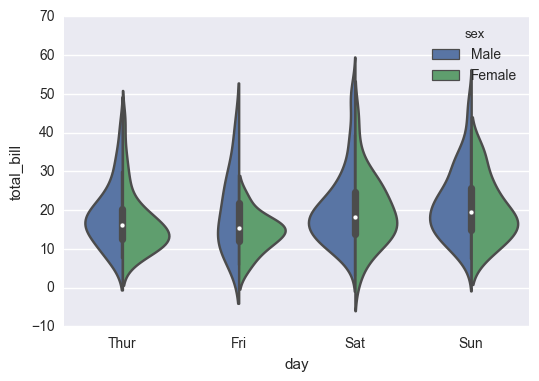

In [19]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


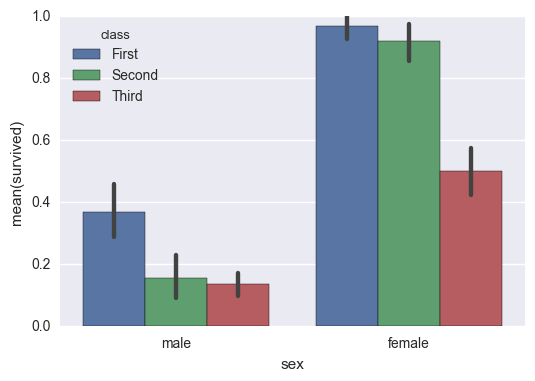

In [21]:
#Bar plot
from numpy import median,mean
sns.barplot(x="sex", y="survived", hue="class", data=titanic,estimator=mean);

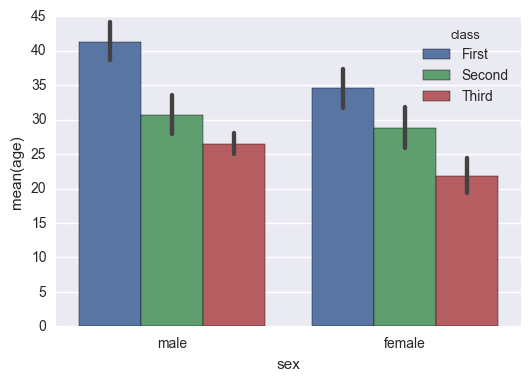

In [22]:
sns.barplot(x="sex", y="age", hue="class", data=titanic);

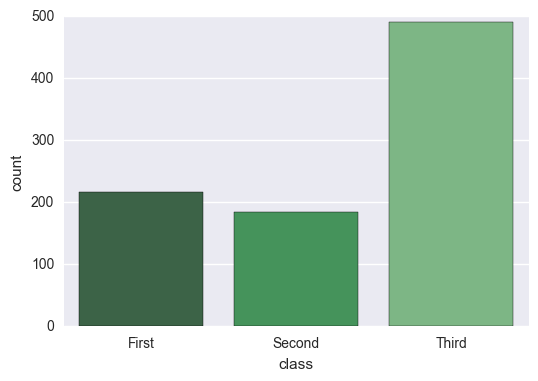

In [23]:
sns.countplot(x="class", data=titanic, palette="Greens_d")

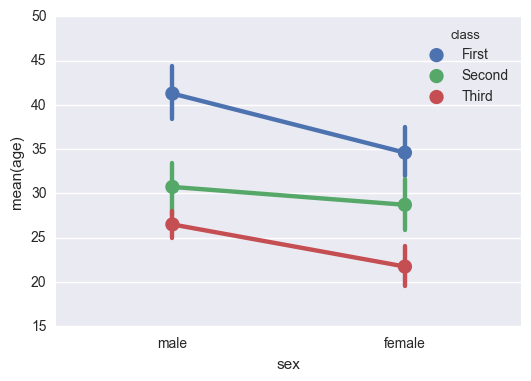

In [24]:
sns.pointplot(x="sex", y="age", hue="class", data=titanic);

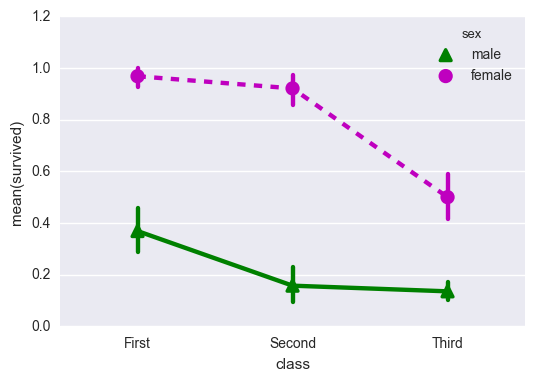

In [25]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

# Multi Panel Plot

In [26]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
149,7.51,2.00,Male,No,Thur,Lunch,2
113,23.95,2.55,Male,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
78,22.76,3.00,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2


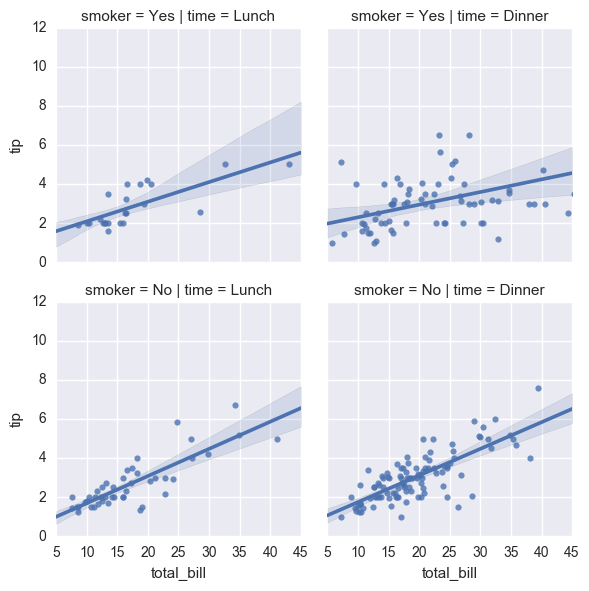

In [27]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.regplot,"total_bill","tip")

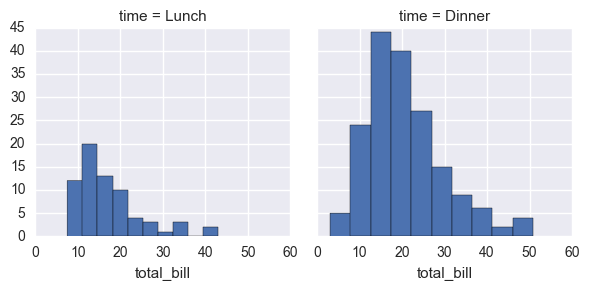

In [28]:
g = sns.FacetGrid(tips,col='time')
g.map(plt.hist,"total_bill")

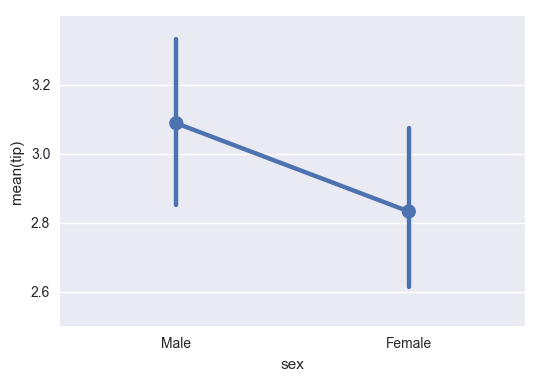

In [29]:
sns.pointplot(x="sex",y="tip",data=tips)

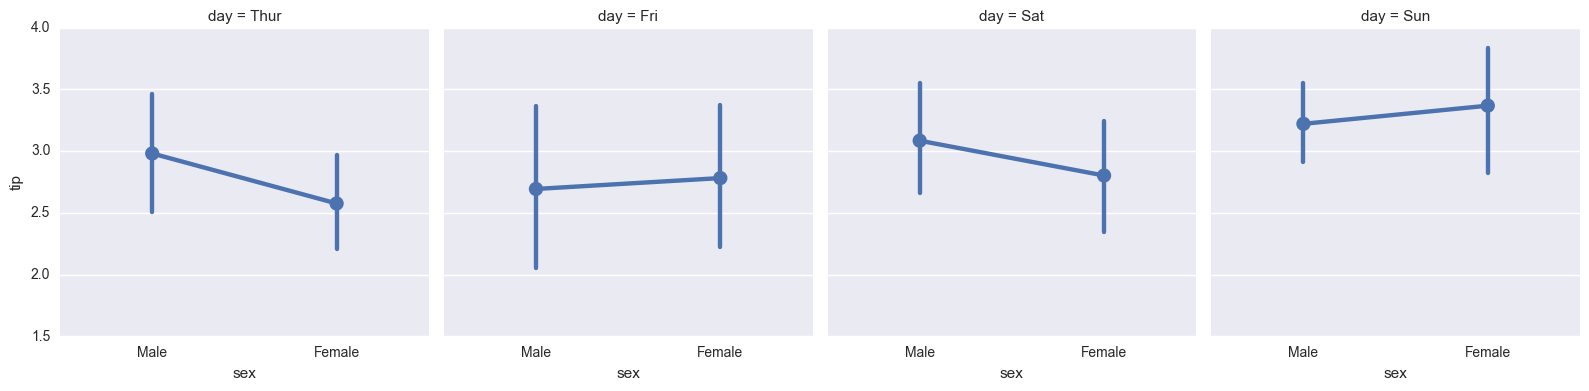

In [30]:
sns.factorplot(x="sex",y="tip",data=tips,col='day')

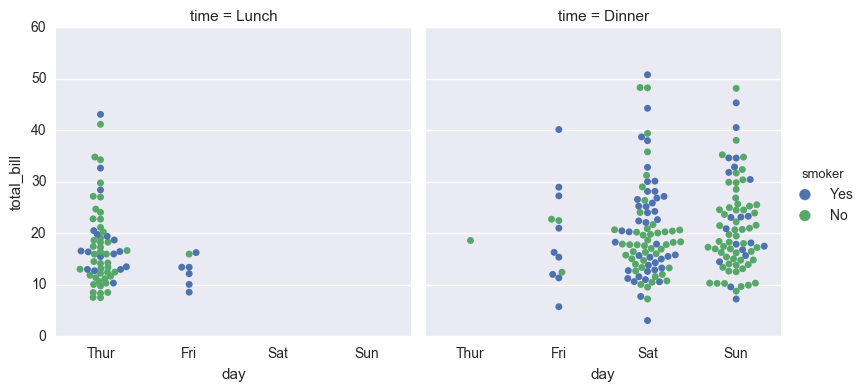

In [31]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

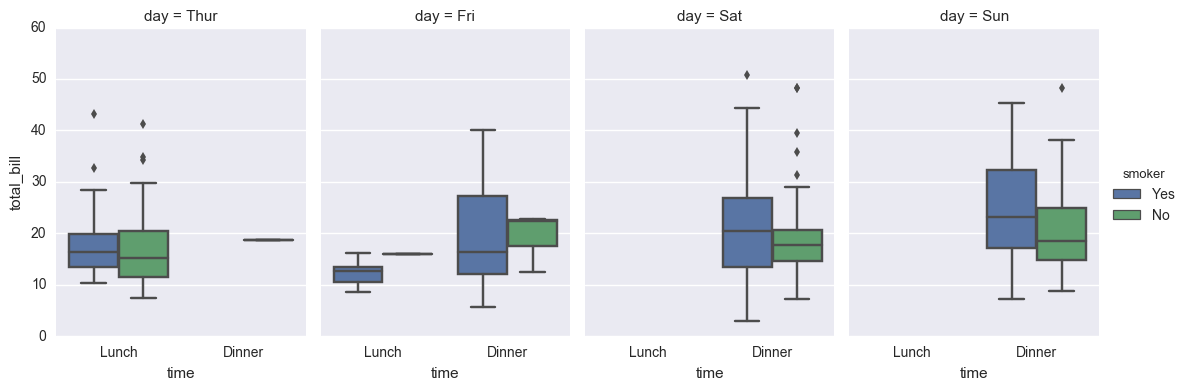

In [32]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.7);

# Heatmap 

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df = pd.pivot_table(titanic,values="survived",index=["sex","class"],columns=["embarked"],aggfunc='mean',fill_value=0)

In [35]:
df.head()

embarked              C         Q         S
sex    class                               
female First   0.976744  1.000000  0.958333
       Second  1.000000  1.000000  0.910448
       Third   0.652174  0.727273  0.375000
male   First   0.404762  0.000000  0.354430
       Second  0.200000  0.000000  0.154639

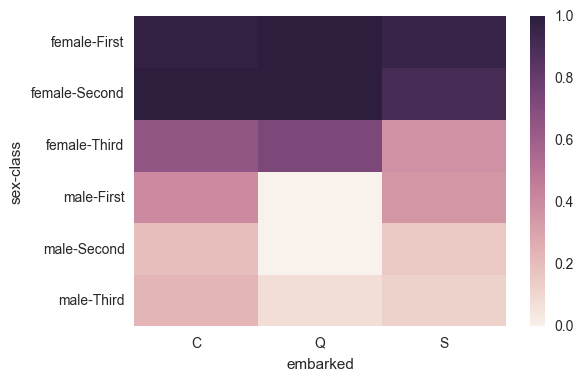

In [36]:
sns.heatmap(df)

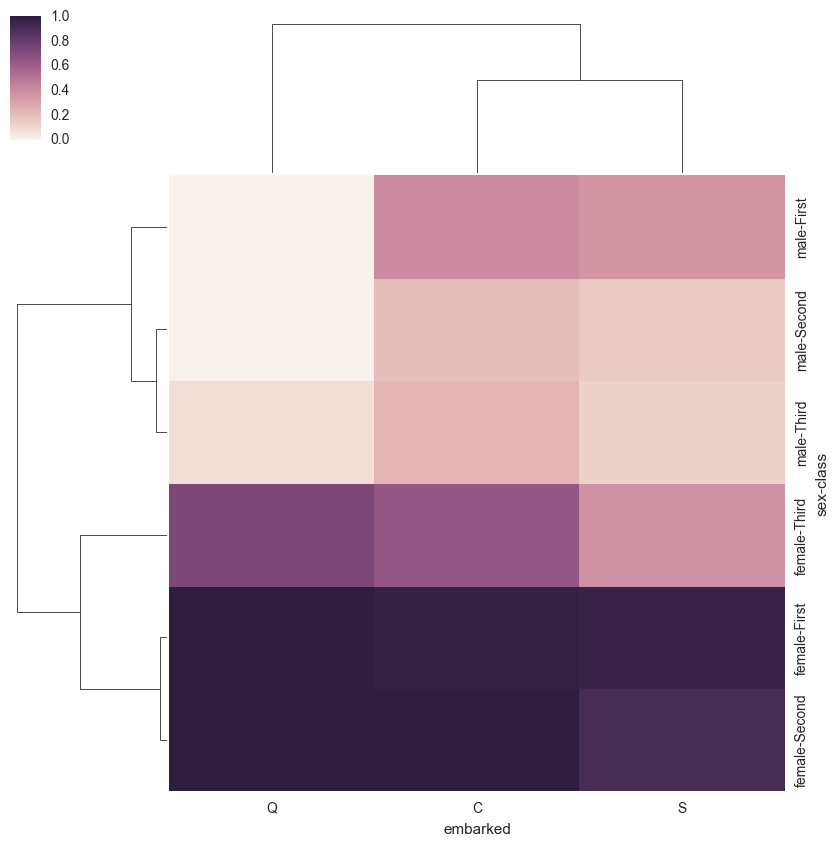

In [37]:
sns.clustermap(df)